##Download Sentinel data

In [ ]:
pip install cdsapi

In [ ]:
import cdsapi

In [ ]:

''' This cell downloads methane data from the European Space Agency database.
    Make adjustments to the year, month and days as needed. '''

### Note: I ran this locally on my laptop and then pushed the files to my Google Drive.
### In order for this to work, you need to set up an account with a username and
### password, and then set up your credentials by creating a .cdsapirc file.

c = cdsapi.Client()

c.retrieve(
    'satellite-methane',
    {
        'format': 'zip',
        'processing_level': 'level_2',
        'year': '2019',
        'month': '08',
        'day': ['31'
        ],
        'version': '9.1',
        'sensor_and_algorithm': 'iasi_metop_b_nlis',
        'variable': 'ch4',
    },
    'download.zip')

Exception: ignored

##Install and load libraries

In [10]:
from scipy.io import netcdf
import netCDF4 as nc4
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import os

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [11]:
pip install --user git+https://github.com/matplotlib/basemap.git

  Cloning https://github.com/matplotlib/basemap.git to /tmp/pip-req-build-wma0ll6g
  Running command git clone -q https://github.com/matplotlib/basemap.git /tmp/pip-req-build-wma0ll6g


In [12]:
pip install pyproj

In [13]:
from mpl_toolkits.basemap import Basemap

### Read data files

In [ ]:
# Set directory for data location 
CACHE_DIR = '/content/drive/My Drive/sentinel_data'

print(CACHE_DIR)

/content/drive/My Drive/sentinel_data


In [ ]:
# List files found in data location.

files = [f for f in os.listdir(CACHE_DIR) if f.endswith('.nc')]
files

['20190804-C3S-L2_GHG-GHG_PRODUCTS-IASI-METOPB-NLIS-DAILY-v9.1.nc',
 '20190802-C3S-L2_GHG-GHG_PRODUCTS-IASI-METOPB-NLIS-DAILY-v9.1.nc',
 '20190801-C3S-L2_GHG-GHG_PRODUCTS-IASI-METOPB-NLIS-DAILY-v9.1.nc',
 '20190803-C3S-L2_GHG-GHG_PRODUCTS-IASI-METOPB-NLIS-DAILY-v9.1.nc',
 '20190820-C3S-L2_GHG-GHG_PRODUCTS-IASI-METOPB-NLIS-DAILY-v9.1.nc',
 '20190813-C3S-L2_GHG-GHG_PRODUCTS-IASI-METOPB-NLIS-DAILY-v9.1.nc',
 '20190831-C3S-L2_GHG-GHG_PRODUCTS-IASI-METOPB-NLIS-DAILY-v9.1.nc',
 '20190810-C3S-L2_GHG-GHG_PRODUCTS-IASI-METOPB-NLIS-DAILY-v9.1.nc',
 '20190825-C3S-L2_GHG-GHG_PRODUCTS-IASI-METOPB-NLIS-DAILY-v9.1.nc',
 '20190819-C3S-L2_GHG-GHG_PRODUCTS-IASI-METOPB-NLIS-DAILY-v9.1.nc',
 '20190805-C3S-L2_GHG-GHG_PRODUCTS-IASI-METOPB-NLIS-DAILY-v9.1.nc',
 '20190806-C3S-L2_GHG-GHG_PRODUCTS-IASI-METOPB-NLIS-DAILY-v9.1.nc',
 '20190809-C3S-L2_GHG-GHG_PRODUCTS-IASI-METOPB-NLIS-DAILY-v9.1.nc',
 '20190822-C3S-L2_GHG-GHG_PRODUCTS-IASI-METOPB-NLIS-DAILY-v9.1.nc',
 '20190829-C3S-L2_GHG-GHG_PRODUCTS-IASI-METOPB-N

In [ ]:
# Look at metadata from sample dataset.

path = CACHE_DIR + '/' + files[0]
fh = Dataset(path, mode='r')
print (fh)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: NLIS
    institution: Laboratoire de Météorologie Dynamique (LMD) - CNRS
    source: 
    reference: Crevoisier et al., ACP, 2009, 2013
    tracking_id: b037f68e-5000-42d3-861a-e71fc6ba507a
    Conventions: CF-1.6
    summary: The non linear inference sheme developed at CNRS-LMD is designed to retrieve mid-tropospheric columns of atmospheric methane (CH4) from radiances measured by the IASI (Infrared Atmospheric Sounding Interferometer) and AMSU (Advanced Microwave Sounding Unit) instruments onboard the Metop platforms. Retrievals are performed for clear-sky situations over land and sea, by day and night, at the spot resolution.
    keywords: satellite, atmosphere, methane
    Naming_authority: lmd.fr
    keywords_vocabulary: 
    cdm_data_type: point
    date_created: 20200624T000000Z - Product generated from CNRS-LMD
    creator_name: Cyril Crevoisier
    creator_email: cyril.crevoisier@l

In [ ]:
# Look at variables.

print (fh.variables)

{'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(sounding_dim)
    units: degrees_north
    standard_name: latitude
    long_name: latitude
    comment: Center latitude of the measurement
    valid_range: [-90.  90.]
unlimited dimensions: sounding_dim
current shape = (15324,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(sounding_dim)
    units: degrees_east
    standard_name: longitude
    long_name: longitude
    comment: Center longitude of the measurement
    valid_range: [-180.  180.]
unlimited dimensions: sounding_dim
current shape = (15324,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(sounding_dim)
    units: seconds since 1970-1-1 0:0:0
    standard_name: time
    long_name: time
    calendar: standard
unlimited dimensions: sounding_dim
current shape = (15324,)
filling on, default _FillValue of 9.969209968

In [ ]:
# Look at the variable CH4.

print (fh.variables['ch4'])

<class 'netCDF4._netCDF4.Variable'>
float32 ch4(sounding_dim)
    units: 1e-9
    long_name: methane mid-tropospheric column
    comment: Retrieved mid-tropopsheric column of atmospheric methane (CH4) in ppb
    _FillValue: -999.0
unlimited dimensions: sounding_dim
current shape = (15324,)
filling on


### Plot the CH4 data

In [14]:
# Check to see that longitude, latitude and CH4 datasets are equal length.

lons = fh.variables['longitude'][:]
lats = fh.variables['latitude'][:]
ch4 = fh.variables['ch4'][:]
print (lons.shape)
print (lats.shape)
print (ch4.shape)

# set CH4 units.
ch4_units = fh.variables['ch4'].units

(15324,)
(15324,)
(15324,)


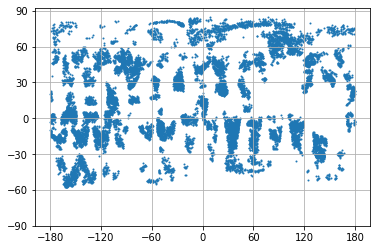

In [15]:
# Plot data as (longitude,latitude)

plt.scatter(lons,lats,s=1)
plt.yticks(np.linspace(-90,90,7))
plt.xticks(np.linspace(-180,180,7))
plt.grid(True)

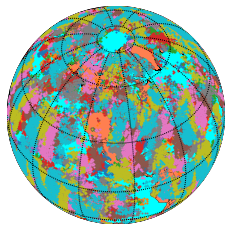

In [16]:
# Plot all data in files on world globe

# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lat = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lon = (delta*np.indices((nlats,nlons))[1,:,:])

# compute native map projection coordinates of lat/lon grid.
x, y = map(lon*180./np.pi, lat*180./np.pi)
#plt.title('contour lines over filled continent background')
for fileno in range(10):
  path = CACHE_DIR + '/' + files[fileno]
  fh = Dataset(path, mode='r')
  lons = fh.variables['longitude'][:]
  lats = fh.variables['latitude'][:]
  ch4 = fh.variables['ch4'][:]
  map.scatter(lons,lats,latlon=True,s=1, zorder=2)
plt.show()

# Note - color indicates file number, not CH4 magnitude
# This plot just shows coverage for all data in files

In [17]:
# data is a masked array
lons

masked_array(data=[142.17, 141.67, 141.2 , ..., 134.82, 134.15, 133.96],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

## United States map

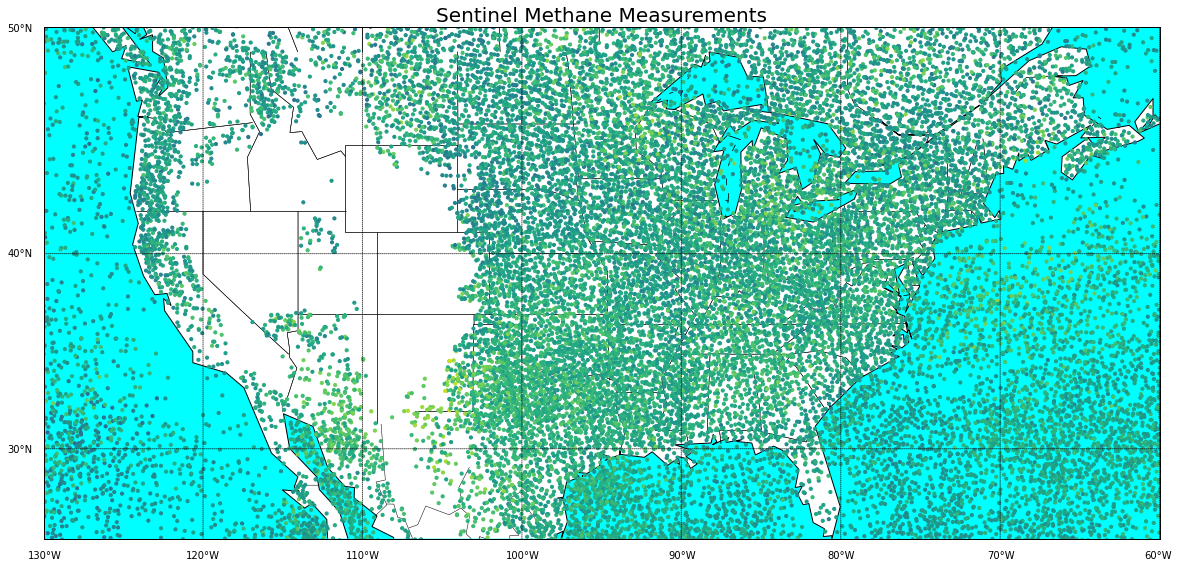

In [18]:
fig = plt.figure(figsize=(20,15))

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',
            llcrnrlat=25,
            urcrnrlat=50,
            llcrnrlon=-130,
            urcrnrlon=-60,
            resolution='c')
m.drawcoastlines()
m.fillcontinents(color='white',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,90.,10.),labels=[True,False,False,False],fontsize=10)
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0,0,0,1],fontsize=10)
m.drawmapboundary(fill_color='aqua')
m.drawstates()

for fileno in range(len(files)):
  path = CACHE_DIR + '/' + files[fileno]
  fh = Dataset(path, mode='r')
  lons = fh.variables['longitude'][:]
  lats = fh.variables['latitude'][:]
  ch4 = fh.variables['ch4'][:]
  m.scatter(lons,lats,latlon=True,c=ch4,s=10, zorder=2)

plt.title("Sentinel Methane Measurements", fontsize=20)
plt.show()

## World map

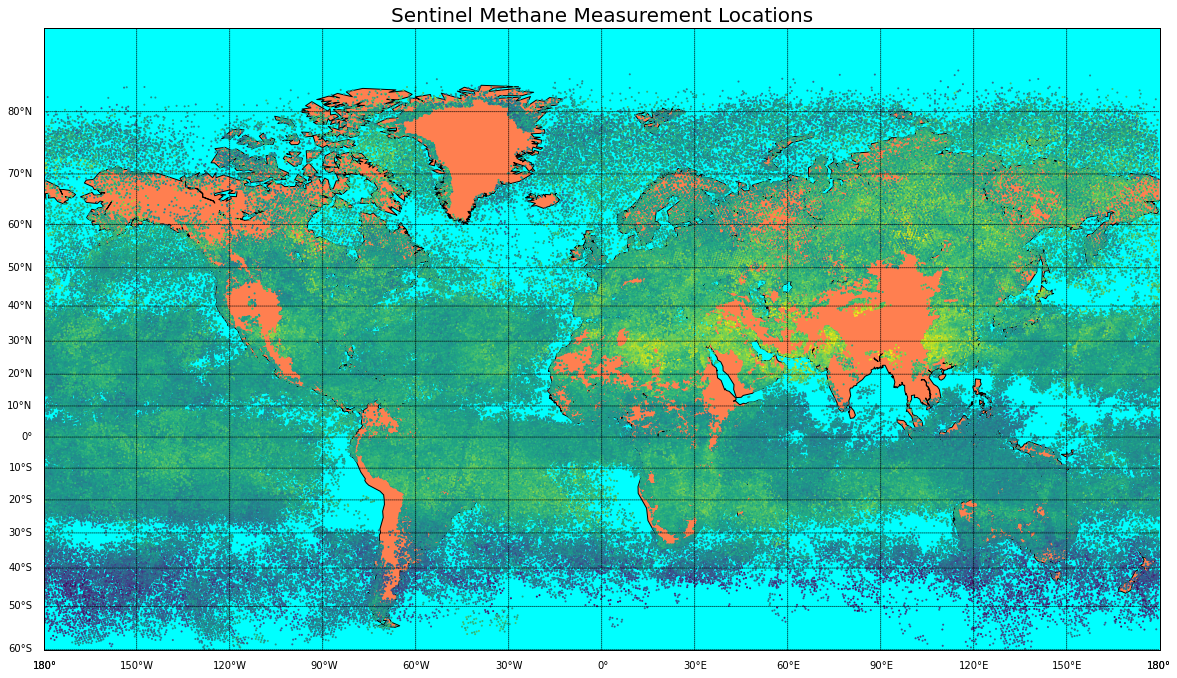

In [20]:
fig = plt.figure(figsize=(20,15))

m = Basemap(projection='mill',
           llcrnrlat = -60,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False],fontsize=10)
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1],fontsize=10)

#colors = 'green'

#m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=1, c=ch4, marker='o', alpha=1, zorder=2)

for fileno in range(len(files)):
  path = CACHE_DIR + '/' + files[fileno]
  fh = Dataset(path, mode='r')
  lons = fh.variables['longitude'][:]
  lats = fh.variables['latitude'][:]
  ch4 = fh.variables['ch4'][:]
  m.scatter(lons,lats,latlon=True, s=1, c=ch4, marker='o', alpha=1, zorder=2)

plt.title('Sentinel Methane Measurement Locations', fontsize=20)

plt.show()